In [ ]:
!pip install numpy matplotlib pillow rembg numpy-stl onnxruntime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.4 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving car.jpg to car (1).jpg


In [ ]:
from rembg import remove
from PIL import Image
import io

def preprocess_image(image_path):
    # Open image
    input_image = Image.open(image_path)

    # backgound ko remove krenge
    output_image = remove(input_image)

    # Save krenge image ko
    output_image_path = "processed_car.png"
    output_image.save(output_image_path)

    return output_image_path

# Call fucntion
processed_image = preprocess_image("car.jpg")
processed_image
from google.colab import files
uploaded = files.upload()
# Path
model_path = '/root/.u2net/u2net.onnx'


Saving u2net.onnx to u2net (1).onnx


In [ ]:
from rembg import remove
from PIL import Image
import io

def preprocess_image(image_path):
    # Open  image
    input_image = Image.open(image_path)

    # Perform  the model
    output_image = remove(input_image, model_path=model_path)

    output_image_path = "processed_car.png"
    output_image.save(output_image_path)

    return output_image_path

# Call the function
processed_image = preprocess_image("car.jpg")
processed_image


'processed_car.png'

In [ ]:
import numpy as np
from PIL import Image
from stl import mesh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def image_to_3d_model(image_path, output_stl):
    # Load image
    img = Image.open(image_path).convert('L')
    img = img.resize((100, 100))  # Resize for simplicity
    img_array = np.array(img)

    # Normalize pixel values to range [0, 10] for height
    img_array = (img_array / 255.0) * 10

    # Create vertices and faces for 3D mesh
    vertices = []
    faces = []

    for i in range(img_array.shape[0] - 1):
        for j in range(img_array.shape[1] - 1):
            v0 = [i, j, img_array[i, j]]
            v1 = [i+1, j, img_array[i+1, j]]
            v2 = [i, j+1, img_array[i, j+1]]
            v3 = [i+1, j+1, img_array[i+1, j+1]]

            idx = len(vertices)
            vertices.extend([v0, v1, v2, v3])

            # Two triangles per square
            faces.append([idx, idx+1, idx+2])
            faces.append([idx+1, idx+3, idx+2])

    vertices = np.array(vertices)
    faces = np.array(faces)

    # Create the mesh
    model_mesh = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
    for i, f in enumerate(faces):
        for j in range(3):
            model_mesh.vectors[i][j] = vertices[f[j], :]

    # Save  STL
    model_mesh.save(output_stl)
    print(f"3D model saved as {output_stl}")

    return vertices

#  function call
vertices = image_to_3d_model("processed_car.png", "car_model.stl")


3D model saved as car_model.stl


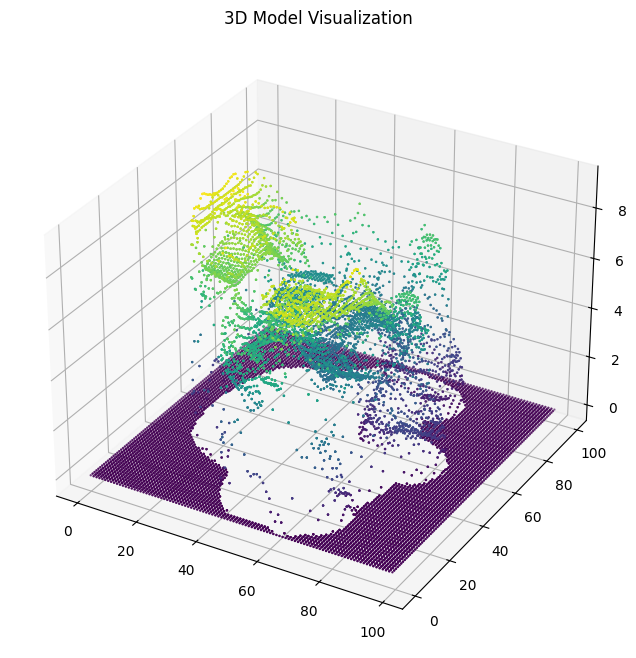

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 3D plot to visualize
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], c=vertices[:,2], cmap='viridis', s=0.5)
ax.set_title('3D Model Visualization')
plt.show()
from google.colab import files
files.download('car_model.stl')

